In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Load dataset CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='../data',train=True,
        download = True)

images = torch.tensor(trainset.data)

Files already downloaded and verified


torch.Size([5000, 32, 32, 3])


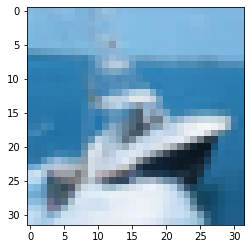

In [16]:
# Get indices of different classes
g = {i:[] for i in range(10)}
{g[j].append(i) for i,j in enumerate(trainset.targets)}
shipset = images[g[8]]
print(shipset.shape)
img_in = shipset[0]
plt.imshow(xin)

In [116]:
# Channel Specific Embedding
d = 8 # n_embd
block_size = 4
batch_size = 2
# (3x256) -> (3xd): Input
# (1x1) -> (1xd): Positional Encoding:
# xpos -> 1xd/2
# ypos -> 1xd/2 => cat both together
posx_embedding = torch.nn.Embedding(32*3,d//2) # 32*3 dim of picture 
posy_embedding = torch.nn.Embedding(32,d//2) # 32 dim of picture
RGB_embeddings = torch.nn.ModuleList([torch.nn.Embedding(256,d) for _ in range(3)])
val_embedding = torch.nn.Embedding(256,d)
# Output (h x w*3 x d)
query = nn.Linear(d,d,bias=False)
key = nn.Linear(d,d,bias=False)
value = nn.Linear(d,d,bias=False)

# Output (hxw*3xd)

In [117]:

tks = torch.arange(block_size) 
print(tks)

tensor([0, 1, 2, 3])


In [126]:
# Get Batch
pos = torch.randint(0,32*32-block_size -1,(batch_size,))
rgb_flat = img_in[0].reshape(32,32*

xin = torch.stack([rgb_flat[i: i + block_size] for i in pos])
tks = pos.unsqueeze(-1) + torch.arange(block_size).unsqueeze(0) 
print(tks)

# Let's keep global position for now
pos_emb = torch.cat([posx_embedding(tks//32),posy_embedding(tks%32)],dim=-1)
print(pos_emb)
val_emb = val_embedding(xin)


emb = pos_emb + val_emb # (1,4) + (1,4) -> (1,4)
print(emb.shape)

tensor([[ 998,  999, 1000, 1001],
        [ 321,  322,  323,  324]])
tensor([[[-0.2960, -0.0527,  0.7014,  0.4490, -0.2712,  0.4102, -0.2798,
           1.1704],
         [-0.2960, -0.0527,  0.7014,  0.4490,  1.0055, -0.7006, -0.5722,
           0.5314],
         [-0.2960, -0.0527,  0.7014,  0.4490,  0.5636, -0.2711, -1.0693,
          -0.2618],
         [-0.2960, -0.0527,  0.7014,  0.4490, -1.0617, -0.1592,  0.8324,
           0.7277]],

        [[ 0.1502,  1.8915,  0.4048,  2.5591,  1.6114,  0.3535,  0.3179,
           0.7545],
         [ 0.1502,  1.8915,  0.4048,  2.5591,  0.2145,  0.7116, -0.6363,
          -0.2419],
         [ 0.1502,  1.8915,  0.4048,  2.5591,  0.6848,  1.4536, -0.5249,
          -1.0711],
         [ 0.1502,  1.8915,  0.4048,  2.5591,  0.0135,  0.7582,  0.2913,
          -1.7214]]], grad_fn=<CatBackward0>)


TypeError: only integer tensors of a single element can be converted to an index

In [115]:
T,C = emb.shape
print(T,C)
q = query(emb)
k = key(emb)
v = value(emb)
wei = q@k.transpose(-2,-1) *(d**-0.5)
wei = wei.masked_fill(torch.tril(torch.ones(block_size,block_size)) == 0,-float('inf'))
wei = F.softmax(wei,dim=-1)
out = wei @ v
print(out)

4 8
tensor([[ 0.0494, -1.0974, -0.2267,  0.3478,  1.5461,  0.4090,  1.1708,  0.0374],
        [ 0.5159, -0.1809,  0.2524,  1.0788,  1.4720, -0.1050,  1.0703, -0.7026],
        [ 0.1767, -0.2640, -0.0152,  0.5309,  1.2677, -0.0586,  0.8840, -0.5875],
        [ 0.8556,  0.2402,  0.0385,  0.8763,  1.5038, -0.3326,  0.9567, -0.9233]],
       grad_fn=<MmBackward0>)


In [159]:
mnist = torchvision.datasets.MNIST("../data/",train = True, download = True)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000, 28, 28])
tensor(0)


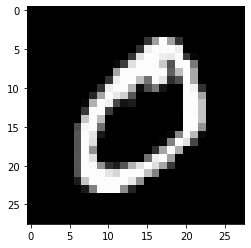

In [201]:

print(mnist.targets)
print(mnist.data.shape)
# Get indices of different classes
g =[[] for _ in range(10)]
{g[j].append(i) for i,j in enumerate(mnist.targets)}
in_data = mnist.data[g[0]]
in_label = mnist.targets[g[0]]
print(in_label[0])
plt.imshow(in_data[0],cmap='gray')

In [194]:
# Channel Specific Embedding
d = 8 # n_embd
block_size = 4
batch_size = 2
img_size = 28
# (1x256) -> (1d): Input
# (1x1) -> (1xd): Positional Encoding:
# xpos -> 1xd/2
# ypos -> 1xd/2 => cat both together
posx_embedding = torch.nn.Embedding(img_size,d//2) # dim of picture 
posy_embedding = torch.nn.Embedding(img_size,d//2) # dim of picture)
val_embedding = torch.nn.Embedding(256,d)
# Output (h x w*3 x d)
query = nn.Linear(d,d,bias=False)
key = nn.Linear(d,d,bias=False)
value = nn.Linear(d,d,bias=False)

# Output (hxw*3xd)

In [200]:
# Get Batch 1D for now
xin = in_data[0].view(img_size*img_size).long().squeeze()
pos = torch.randint(0,img_size*img_size-block_size -1,(batch_size,))
xin = torch.stack([xin[i: i + block_size] for i in pos])
yin = torch.stack([xin[i+1: i+1 + block_size] for i in pos]) 


print(tks)
# Let's keep global position for now
pos_emb = torch.cat([posx_embedding(tks//28),posy_embedding(tks%28)],dim=-1)
val_emb = val_embedding(xin)

print(val_emb.shape)
print(pos_emb.shape)

emb = pos_emb + val_emb # (1,4) + (1,4) -> (1,4)
print(emb.shape)

tensor([[522, 523, 524, 525],
        [  4,   5,   6,   7]])
torch.Size([2, 4, 8])
torch.Size([2, 4, 8])
torch.Size([2, 4, 8])


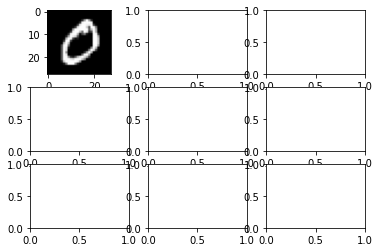

In [204]:
images = [in_data[i] for i in range(9)]
fig,axs = plt.subplots(3,3)
axs[0][0].imshow(images[0],cmap='gray')